In [1]:
%matplotlib inline 
#%matplotlib qt5


In [2]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
dir(dataset)


['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
features, names = dataset.data, dataset.target

print(features.shape)
print(names.shape)
print(dataset.feature_names)
print(dataset.target_names)


(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
import numpy as np

tile_tuple = (features.shape[0],1)
numerator = (features - np.tile(np.min(features, axis=0), tile_tuple))
denominator = (np.tile(np.max(features, axis=0) - np.min(features, axis=0), tile_tuple))
dataset_normalized = numerator / denominator

print(tile_tuple)
print(dataset_normalized.shape)
print('[', np.min(dataset_normalized), ',', np.max(dataset_normalized), ']')
print(dataset_normalized.shape == features.shape)


(569, 1)
(569, 30)
[ 0.0 , 1.0 ]
True


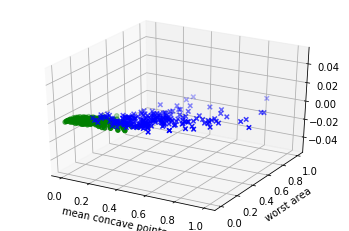

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_name = 0
y_name = 1
feature_a = 7
feature_b = 23

x_arg1 = dataset_normalized[names == x_name,feature_a]
x_arg2 = dataset_normalized[names == y_name,feature_a]
y_arg1 = dataset_normalized[names == x_name,feature_b]
y_arg2 = dataset_normalized[names == y_name,feature_b]

ax.scatter(x_arg1, y_arg1, c='b', marker='x', label=dataset.target_names[x_name])
ax.scatter(x_arg2, y_arg2, c='g', marker='o', label=dataset.target_names[y_name])
ax.set_xlabel(dataset.feature_names[feature_a])
ax.set_ylabel(dataset.feature_names[feature_b])

plt.show()

#

In [6]:
from imageio import imread
import os

catalogue_path = r'./GTSRB/Final_Training/Images/00000'
file_path = os.path.join(catalogue_path, r'00000_00000.ppm')
img = imread(file_path)
img.shape

# Obraz rozmiaru 30x29.
# Każdy wpis zawiera 3-elementową krotkę (r,g,b).


(30, 29, 3)

In [7]:
import csv


def get_file_names_from_csv(csv_path : str) -> list:
    file_names = []
    
    with open(csv_path, mode='r') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=';')
        
        for row in csv_reader:
            file_names.append(row['Filename'])
            
    return file_names
        
        
csv_file_path = os.path.join(catalogue_path, r'GT-00000.csv')
csv_file_names = get_file_names_from_csv(csv_file_path)
print(len(csv_file_names))


210


In [8]:
def read_images(file_names : list) -> list:
    images = []
    
    for name in file_names:
        file_path = os.path.join(catalogue_path, name)
        img = imread(file_path)
        images.append(img)
    
    return images


csv_images = read_images(csv_file_names)
print(len(csv_images))
print(csv_images[0].shape)


210
(30, 29, 3)


[19, 1, 6, 10, 23, 22, 24, 7, 9, 21, 2, 15, 0, 20, 3, 4, 18, 13, 11, 8, 5, 16, 12, 17, 14]
25


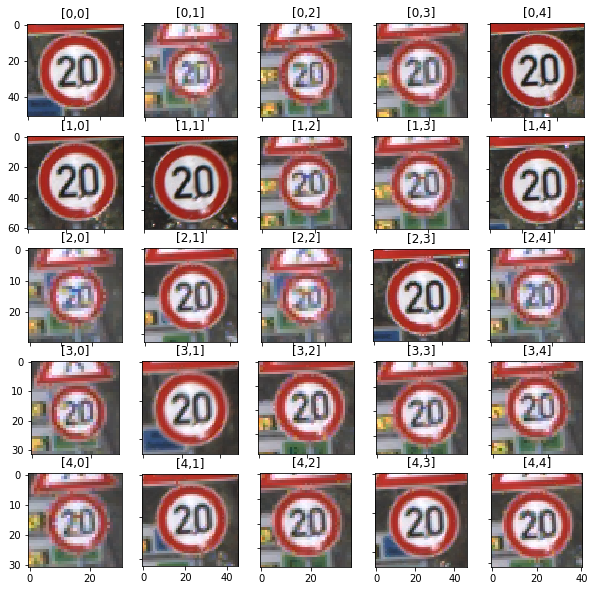

In [9]:
import matplotlib.pyplot as plt
import random as rnd


def get_random_indices(left : int, right : int, range_tuple : tuple, limit:int=None) -> list:
    size = range_tuple[0] * range_tuple[1]
    ordinals = [i for i in range(0, size)]
    rnd.shuffle(ordinals)
    return ordinals[0:(size if limit is None else limit)]
    

xy_max = (5,5)
fig, axs = plt.subplots(xy_max[0], xy_max[1], figsize=(10,10))
indices = get_random_indices(0, len(csv_images), xy_max)
print(indices)
print(len(indices))
img_index = 0


for i in range(xy_max[0]):
    for j in range(xy_max[1]):
        axs[i, j].imshow(csv_images[indices[img_index]])
        axs[i, j].set_title('[' + str(i) + ',' + str(j) + ']')
        img_index += 1

for ax in axs.flat:
    ax.label_outer()
    
plt.show()